In [1]:
import os, sys, time, glob
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
from scipy.io import wavfile
from scipy import signal

os.chdir('/Users/urai/Documents/code/ibllib')
from python.alf.extractors.basic_trials import extract_trials

In [2]:
datafolder = '/Users/urai/Data/ibldata/IBL_11/2018-10-16/9/'

# extract behavioral events
try:
    extract_trials(datafolder)
except:
    warning('Alf event extraction failed')
    pass

In [3]:
# LOAD SOUND FILE
soundfile = os.path.join(datafolder, 'raw_behavior_data', '_ibl_micData.raw.wav')
fs, data = wavfile.read(soundfile, mmap=False)

[ 0  0 -1 ...  1  0  1]


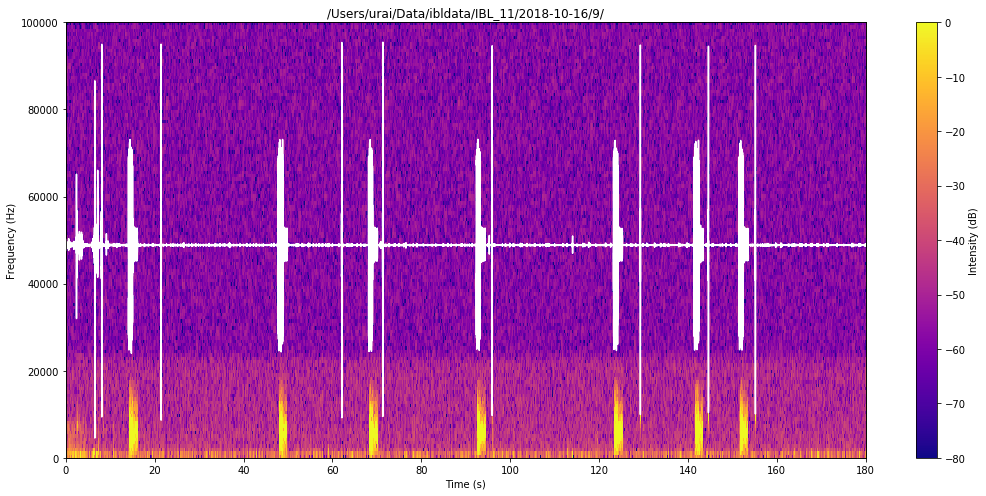

In [10]:
# take only a small part at the beginning of the session to keep things manageable
data = data[0:fs*60*3] # one minute at 200 KHz

t = np.linspace(0, len(data)/fs, num=len(data))
# f, t, Sxx = signal.spectrogram(data, fsample)

fig, ax = plt.subplots(1,1,figsize=(15,7))
Pxx, freqs, bins, im = ax.specgram(data, Fs=fs, cmap=plt.get_cmap('plasma'), 
                                    scale='dB', vmin=-80, vmax=0)
fig.colorbar(im).set_label('Intensity (dB)')

# add timecourse on top
ax2 = ax.twinx()
ax2.plot(t, data, 'w')
ax2.set(yticks=[])

ax.set(ylabel="Frequency (Hz)", xlabel='Time (s)', xlim=[0, t.max()], title=datafolder)
plt.tight_layout()
plt.savefig(os.path.join(datafolder, "spectrogram.pdf"))

In [ ]:
# BEEP-TRIGGERED WAVEFORM
# VALVE CLICK-TRIGGERED WAVEFORM
# PUNISHMENT NOISE-TRIGGERED WAVEFORM

# TODO: SUBTRACT THESE 3 ESTIMATED TEMPLATES, WORK WITH THE RESIDUALS TO 
# 1. DETECT USVS
# 2. CAPTURE OVERALL NOISE LEVELS